In [1]:
from tensorflow.keras.datasets import cifar10
(in_train, out_train), (in_test, out_test) = cifar10.load_data()

type(in_train)
# Output
# numpy.ndarray
in_train.shape
# Output
# (50000, 32, 32, 3)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 214s 1us/step


(50000, 32, 32, 3)

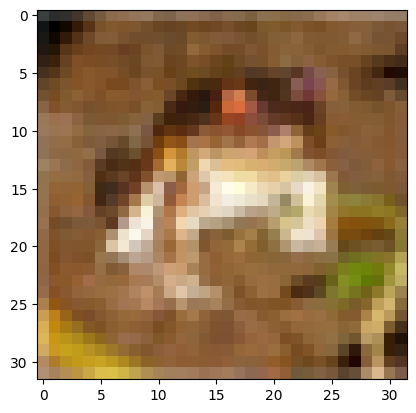

In [2]:
import matplotlib.pyplot as plt
plt.imshow(in_train[0])

In [3]:
in_train.max()
# Output
# 255
in_train = in_train/255
in_test = in_test/255

In [4]:
type(out_train)
# Output
# numpy.ndarray
out_train.shape
# Output
# (50000, 1)
out_train[0]
# Output
# array([6], dtype=uint8)

array([6], dtype=uint8)

In [5]:
from tensorflow.keras.utils import to_categorical
out_cat_train = to_categorical(out_train, 10)
out_cat_test = to_categorical(out_test, 10)

In [6]:
out_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [7]:
out_train[0]
# Output
# array([6], dtype=uint8)
out_cat_train[0]
# Output
# array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [9]:
# Create Sequential Model
model = Sequential()
# Layer 1: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu',))
# Layer 2: Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
# Layer 3: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu',))
# Layer 4: Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
# Layer 5: Flatten Layer
model.add(Flatten())
# Layer 6: Dense Layer (Hidden Layer)
model.add(Dense(256, activation='relu'))
# Layer 7: Dense Layer (Output Layer)
model.add(Dense(10, activation='softmax'))

/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(in_train, out_cat_train, epochs=15, validation_data=(in_test, out_cat_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3680 - loss: 1.7248 - val_accuracy: 0.5346 - val_loss: 1.3143
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5644 - loss: 1.2310 - val_accuracy: 0.5914 - val_loss: 1.1589
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6251 - loss: 1.0647 - val_accuracy: 0.6248 - val_loss: 1.0635
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6674 - loss: 0.9457 - val_accuracy: 0.6457 - val_loss: 1.0189
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6984 - loss: 0.8578 - val_accuracy: 0.6530 - val_loss: 1.0137
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7270 - loss: 0.7822 - val_accuracy: 0.6685 - val_loss: 0.9632
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7558 - loss: 0.7040 - val_accuracy: 0.6676 - val_loss: 0.9773
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7732 - loss:

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(in_train, out_cat_train, epochs=15, validation_data=(in_test, out_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9027 - loss: 0.2800 - val_accuracy: 0.6715 - val_loss: 1.3792
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9127 - loss: 0.2511 - val_accuracy: 0.6620 - val_loss: 1.5077
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9208 - loss: 0.2302 - val_accuracy: 0.6564 - val_loss: 1.6170


In [23]:
model.history.history

{'accuracy': [0.891219973564148, 0.902679979801178, 0.9114599823951721],
 'loss': [0.3076857924461365, 0.27799192070961, 0.25268542766571045],
 'val_accuracy': [0.671500027179718, 0.6620000004768372, 0.6564000248908997],
 'val_loss': [1.3791583776474, 1.5076848268508911, 1.617013931274414]}

In [15]:

import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.89122,0.307686,0.6715,1.379158
1,0.90268,0.277992,0.6620,1.507685
2,0.91146,0.252685,0.6564,1.617014


<Axes: >

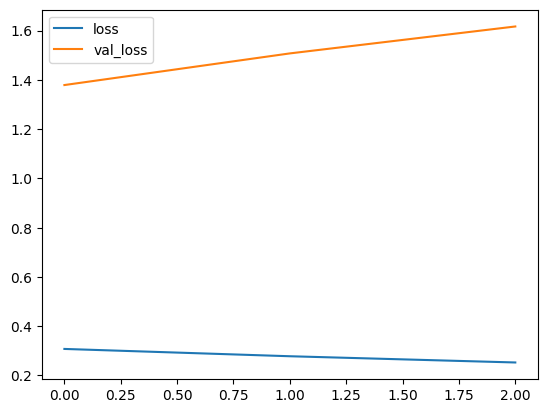

In [16]:
metrics[['loss', 'val_loss']].plot()


<Axes: >

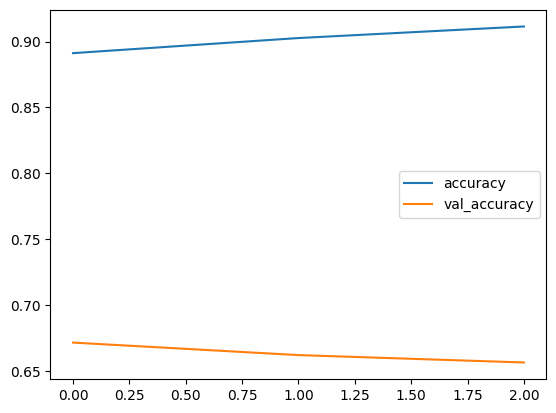

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()


In [18]:
model.evaluate(in_test, out_cat_test, verbose=0)


[1.617013931274414, 0.6564000248908997]

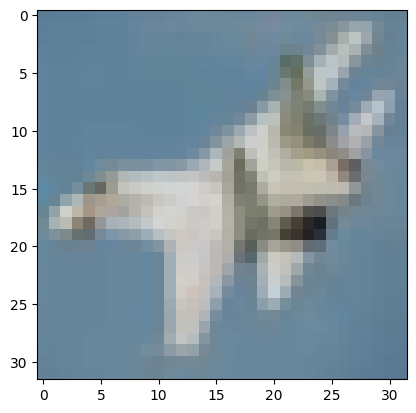

In [20]:
from tensorflow.keras.datasets import cifar10
(in_train, out_train), (in_test, out_test) = cifar10.load_data()
my_image = in_test[10]
plt.imshow(my_image)

In [21]:
model.predict_classes(my_image.reshape(1,32,32,3))
# Output
# array([0])

AttributeError: 'Sequential' object has no attribute 'predict_classes'